
Fixing Automatic Classification of Wasan Kanji
---

In this notebook we are going to have a small application to read Kanji that were previously detected and classified and show the classification results. Users will then be asked to either confirm or refute (allowing for entering the right classification. 

In [ ]:
# download github code

In [1]:
# general imports
from matplotlib import pyplot as plt
import os
import timeit
import cv2
import numpy as np
from pathlib import Path
import pandas as pd

import time


#local function imports
from imageUtils import read_Color_Image

In [2]:
# Integrate plots into notebook
#%matplotlib notebook
%matplotlib inline

# Preliminaries


## Download Data

First, we will donwload the data to make sure we have it in our colab machine or our local computer using either [the "requests" library](https://requests.readthedocs.io/en/latest/) or the wget linux command.

In [ ]:
import urllib.request

# Check if we are in colab or not and choose the best option for every case
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  !wget 'https://www.dropbox.com/scl/fi/gu9rfe7czbsxwipbkihbe/Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0'
  !mv "Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0" Data_Sarah.zip
else:
    url = 'https://www.dropbox.com/scl/fi/gu9rfe7czbsxwipbkihbe/Data_Sarah.zip?rlkey=gc9wbbg5k189mi07pjjzvhkl4&st=nnizw49z&dl=0'
    filename = 'Data_Sarah.zip'
    urllib.request.urlretrieve(url, filename)

!unzip Data_Sarah.zip


## Explain what we will see

In [3]:
# variables
dataFolder = "./OU"
annotationFile ="./kanjiPredictions.txt"

## Load annotations

In [4]:
data = pd.read_csv(annotationFile)

In [5]:
numPreds = len(data.columns)-1
data

,imageName,Pred1,Pred2,Pred3,Pred4,Pred5
0,sakuma-0001_Pаgina_04_Imagen_0001kanjiX2128Y19...,湯,満,賎,賊,賤
1,sakuma-0001_Pаgina_04_Imagen_0001kanjiX846Y154...,浅,殘,儀,賊,盛
2,sakuma-0001_Pаgina_04_Imagen_0001kanjiX1418Y30...,酒,風,物,國,曲
3,sakuma-0001_Pаgina_04_Imagen_0001kanjiX2208Y23...,同,日,而,前,雨
4,sakuma-0001_Pаgina_04_Imagen_0001kanjiX1038Y22...,也,口,候,込,六
...,...,...,...,...,...,...
154,sakuma-0001_Pаgina_04_Imagen_0001kanjiX1115Y11...,賊,暇,助,物,納
155,sakuma-0001_Pаgina_04_Imagen_0001kanjiX948Y850...,候,日,同,門,川
156,sakuma-0001_Pаgina_04_Imagen_0001kanjiX2122Y18...,同,酒,成,次,候
157,sakuma-0001_Pаgina_04_Imagen_0001kanjiX1126Y25...,湯,酒,風,順,帰


In [6]:
def stringFromPreds(info):
    """
    Create a string to print
    from predictions
    """
    retS = ""
    for i in range(1,len(info)):
        retS+=str(i)+": "+info[i]+" "
    return retS

In [ ]:
    ###NOT IN USE
    
    # update the annotation file at ecery iteration just in case
    df = pd.DataFrame.from_dict(outputDict, orient='index',columns = dirs)
    #df.rename(columns={0: 'TreeID'})
    df.to_csv(outputFile)

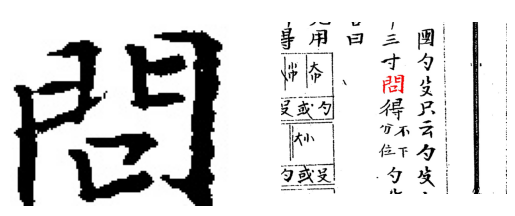

1: 湯 2: 満 3: 賎 4: 賊 5: 賤 
 Press a number to choose, or type your kanji, "b" to finish, 0 if you don't know問
added new Kanji 問


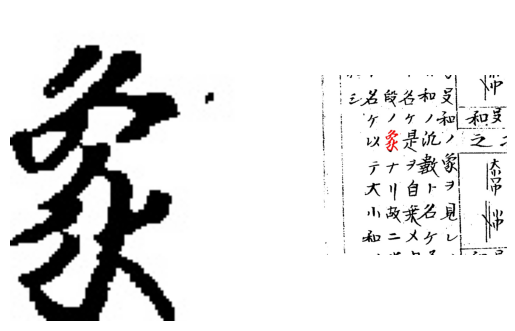

1: 浅 2: 殘 3: 儀 4: 賊 5: 盛 
 Press a number to choose, or type your kanji, "b" to finish, 0 if you don't knowb
BREAK!


In [16]:
# modify iteration variables if necessary
firstPos = 0
lastPos = 158

#pos
for row in data.iterrows():
    # read image
    im = read_Color_Image(os.path.join(dataFolder,row[1].imageName))
    imContext = read_Color_Image(os.path.join(dataFolder,"CONTEXT"+row[1].imageName))[:,:,::-1]
    
    f, axarr = plt.subplots(1,2)

    # now show patches for an id
    axarr[0].imshow(im)
    axarr[0].axis('off')
    axarr[1].imshow(imContext)
    axarr[1].axis('off')
    #plt.subplots_adjust(wspace=0.2, hspace=-0.6)
    plt.show()
    time.sleep(0.5)
    key = input(stringFromPreds(row[1])+"\n Press a number to choose, or type your kanji, \"b\" to finish, 0 if you don't know")
    try:
        val = int(key)
        if 0 < val <= numPreds:
            print(" Choose option "+key+" : "+row[1][val])
        elif 0 == val:
            print("UNKNOWN")
        else:
            print("Wrong number entered, moving on as if unknown")
    except:
        if key == "b":
            print("BREAK!")
            break
        else:
            if len(key)>1:
                print("Wrong information entered, moving on as if unknown")
            else:
                print("added new Kanji "+str(key))

# 